Recurrent Neural Network (Google stock price predictor)

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Importing the training set

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [3]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


Feature Scaling

In [4]:
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [5]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [6]:
#Creating a data structure with 60 time steps and 1 output
X_train=[]
y_train=[]
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [8]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [9]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


Building the RNN

In [11]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
#initialing the RNN
regressor=Sequential()

In [13]:
#Adding the fist LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

C:\Users\saake\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#Adding a second LSTM layer and some dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
#Adding a third LSTM layer and some dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [16]:
#Adding a fourth LSTM layer and some dropout
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [17]:
#Adding the output layer
regressor.add(Dense(units=1))

In [18]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
#Fitting the RNN to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0954
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0054
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0057
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0053
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0052
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0041
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0046
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0037
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - l

Making the predictions

In [20]:
#Getting the real stock price of 2017
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [22]:
#Getting inputs for sc transform of test set
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test) - 60 : ].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [23]:
#Creating an X_test with 60 previous stock prices to predict on given day
X_test=[]
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
print(X_test)

[[0.9299055  0.93113327 0.92750577 ... 0.95725128 0.93796041 0.93688146]
 [0.93113327 0.92750577 0.94415507 ... 0.93796041 0.93688146 0.92955205]
 [0.92750577 0.94415507 0.93876032 ... 0.93688146 0.92955205 0.94731751]
 ...
 [0.96054394 0.9371419  0.92841729 ... 1.01045465 1.02407173 1.03930724]
 [0.9371419  0.92841729 0.90804747 ... 1.02407173 1.03930724 1.03354044]
 [0.92841729 0.90804747 0.8771858  ... 1.03930724 1.03354044 0.99624228]]


In [25]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test)

[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [26]:
#predicting results on X_test
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


In [27]:
print(predicted_stock_price)

[[770.0484 ]
 [767.5738 ]
 [767.4537 ]
 [768.5361 ]
 [771.3697 ]
 [776.5261 ]
 [781.6427 ]
 [784.2344 ]
 [785.01245]
 [785.0354 ]
 [784.86914]
 [784.57477]
 [784.2771 ]
 [784.55634]
 [785.29376]
 [789.11615]
 [795.244  ]
 [802.1328 ]
 [806.42444]
 [803.7924 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

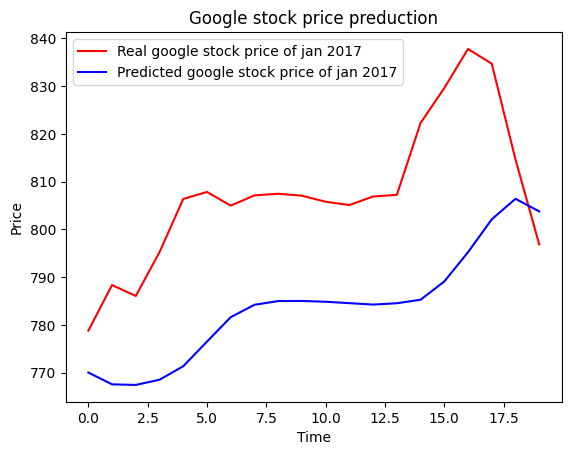

In [28]:
# Visualizing the results
plt.plot(real_stock_price, color='red',label='Real google stock price of jan 2017')
plt.plot(predicted_stock_price, color='blue',label='Predicted google stock price of jan 2017')
plt.title('Google stock price preduction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show